In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
trees_h = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 25]
criterions = ["gini", "entropy"]
splitters = ["best", "random"]
best_d = []
best_c = []
best_s = []
best_acc = []

In [3]:
for i in range(1, 22):
    best_accuracy = 0
    best_depth = 0
    best_criterion = "gini"
    best_splitter = "best"
    if i < 10:
        dataset_train = pd.read_csv("datasets/dt/" + "0" + str(i) + "_train.csv")
        dataset_test = pd.read_csv("datasets/dt/" + "0" + str(i) + "_test.csv")
    else:
        dataset_train = pd.read_csv("datasets/dt/" + str(i) + "_train.csv")
        dataset_test = pd.read_csv("datasets/dt/" + str(i) + "_test.csv")
    X_train = dataset_train.drop('y', axis=1)
    y_train = dataset_train['y']
    X_test = dataset_test.drop('y', axis=1)
    y_test = dataset_test['y']
    classifier = DecisionTreeClassifier()
    for height in trees_h:
        classifier.max_depth = height
        for criterion in criterions:
            classifier.criterion = criterion
            for splitter in splitters:
                classifier.splitter = splitter
                classifier.fit(X_train, y_train)
                count = 0
                pred = classifier.predict(X_test)
                for j in range(len(dataset_test)):
                    if pred[j] == y_test[j]:
                        count += 1
                if count / len(dataset_test) >= best_accuracy:
                    best_accuracy = count / len(dataset_test)
                    best_depth = height
                    best_criterion = criterion
                    best_splitter = splitter
    best_d.append(best_depth)
    best_c.append(best_criterion)
    best_s.append(best_splitter)
    best_acc.append(best_accuracy)

list(zip(best_acc, best_d, best_c, best_s))

[(0.9997429966589566, 3, 'entropy', 'best'),
 (0.7007633587786259, 9, 'entropy', 'best'),
 (1.0, 3, 'entropy', 'best'),
 (0.9951304347826087, 5, 'entropy', 'best'),
 (0.9956709956709957, 4, 'gini', 'best'),
 (0.9988962472406181, 3, 'entropy', 'best'),
 (0.9967441860465116, 3, 'entropy', 'best'),
 (0.997920997920998, 4, 'entropy', 'best'),
 (0.8431372549019608, 5, 'entropy', 'best'),
 (0.9979879275653923, 4, 'entropy', 'best'),
 (0.999195171026157, 3, 'entropy', 'best'),
 (0.8759472354757227, 10, 'entropy', 'best'),
 (0.6568807339449542, 7, 'entropy', 'best'),
 (0.990351215746816, 5, 'entropy', 'best'),
 (1.0, 2, 'entropy', 'best'),
 (1.0, 3, 'entropy', 'best'),
 (0.8458961474036851, 7, 'entropy', 'best'),
 (0.9426656738644825, 5, 'entropy', 'best'),
 (0.8252063015753939, 7, 'entropy', 'best'),
 (0.9706814580031695, 7, 'entropy', 'best'),
 (0.8053265694356373, 15, 'entropy', 'best')]

15 21


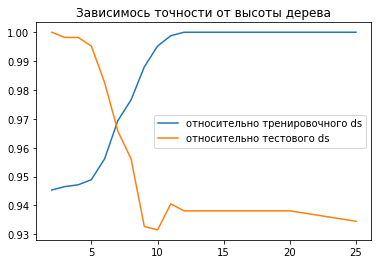

In [8]:
shortest_num = 100
highest_num = 0
short_i = 0
high_i = 0
for i in range(len(best_d)):
    if best_d[i] < shortest_num:
        shortest_num = best_d[i]
        short_i = i + 1
    if best_d[i] > highest_num:
        highest_num = best_d[i]
        high_i = i + 1
print(short_i, high_i)

acc_train_short = []
acc_train_high = []

classifier.criterion = best_c[short_i - 1]
classifier.splitter = best_s[short_i - 1]
if short_i < 10:
    dataset_train = pd.read_csv("datasets/dt/" + "0" + str(short_i) + "_train.csv")
    dataset_test = pd.read_csv("datasets/dt/" + "0" + str(short_i) + "_test.csv")
else:
    dataset_train = pd.read_csv("datasets/dt/" + str(short_i) + "_train.csv")
    dataset_test = pd.read_csv("datasets/dt/" + str(short_i) + "_test.csv")
X_train = dataset_train.drop('y', axis=1)
y_train = dataset_train['y']
X_test = dataset_test.drop('y', axis=1)
y_test = dataset_test['y']
acc_short = []
for height in trees_h:
    classifier.max_depth = height
    classifier.fit(X_train, y_train)
    count = 0
    pred = classifier.predict(X_train)
    for j in range(len(dataset_train)):
        if pred[j] == y_train[j]:
            count += 1
    acc_train_short.append(count / len(dataset_train))
    count = 0
    pred = classifier.predict(X_test)
    for j in range(len(dataset_test)):
        if pred[j] == y_test[j]:
            count += 1
    acc_short.append(count / len(dataset_test))
plt.title("Зависимось точности от высоты дерева")
plt.plot(trees_h, acc_train_short, label="относительно тренировочного ds")

plt.plot(trees_h, acc_short, label="относительно тестового ds")
plt.legend()
plt.show()

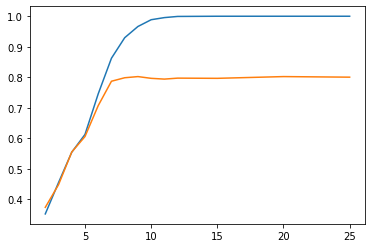

In [5]:
classifier.criterion = best_c[high_i - 1]
classifier.splitter = best_s[high_i - 1]
if high_i < 10:
    dataset_train = pd.read_csv("datasets/dt/" + "0" + str(high_i) + "_train.csv")
    dataset_test = pd.read_csv("datasets/dt/" + "0" + str(high_i) + "_test.csv")
else:
    dataset_train = pd.read_csv("datasets/dt/" + str(high_i) + "_train.csv")
    dataset_test = pd.read_csv("datasets/dt/" + str(high_i) + "_test.csv")
X_train = dataset_train.drop('y', axis=1)
y_train = dataset_train['y']
X_test = dataset_test.drop('y', axis=1)
y_test = dataset_test['y']
acc_high = []
for height in trees_h:
    classifier.max_depth = height
    classifier.fit(X_train, y_train)
    count = 0
    pred = classifier.predict(X_train)
    for j in range(len(dataset_train)):
        if pred[j] == y_train[j]:
            count += 1
    acc_train_high.append(count / len(dataset_train))
    count = 0
    pred = classifier.predict(X_test)
    for j in range(len(dataset_test)):
        if pred[j] == y_test[j]:
            count += 1
    acc_high.append(count / len(dataset_test))

plt.plot(trees_h, acc_train_high)

plt.plot(trees_h, acc_high)
plt.show()
